In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
train_path = '/content/train.csv'  
test_path = '/content/test.csv'

# Load datasets
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# View the first few rows
print(train_data.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [3]:
print(train_data.info())  
print(train_data.describe()) 
print(train_data.isnull().sum())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
selected_columns = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice'] 
data = train_data[selected_columns]

data = data.dropna()

print(data.head())


   GrLivArea  BedroomAbvGr  FullBath  SalePrice
0       1710             3         2     208500
1       1262             3         2     181500
2       1786             3         2     223500
3       1717             3         1     140000
4       2198             4         2     250000


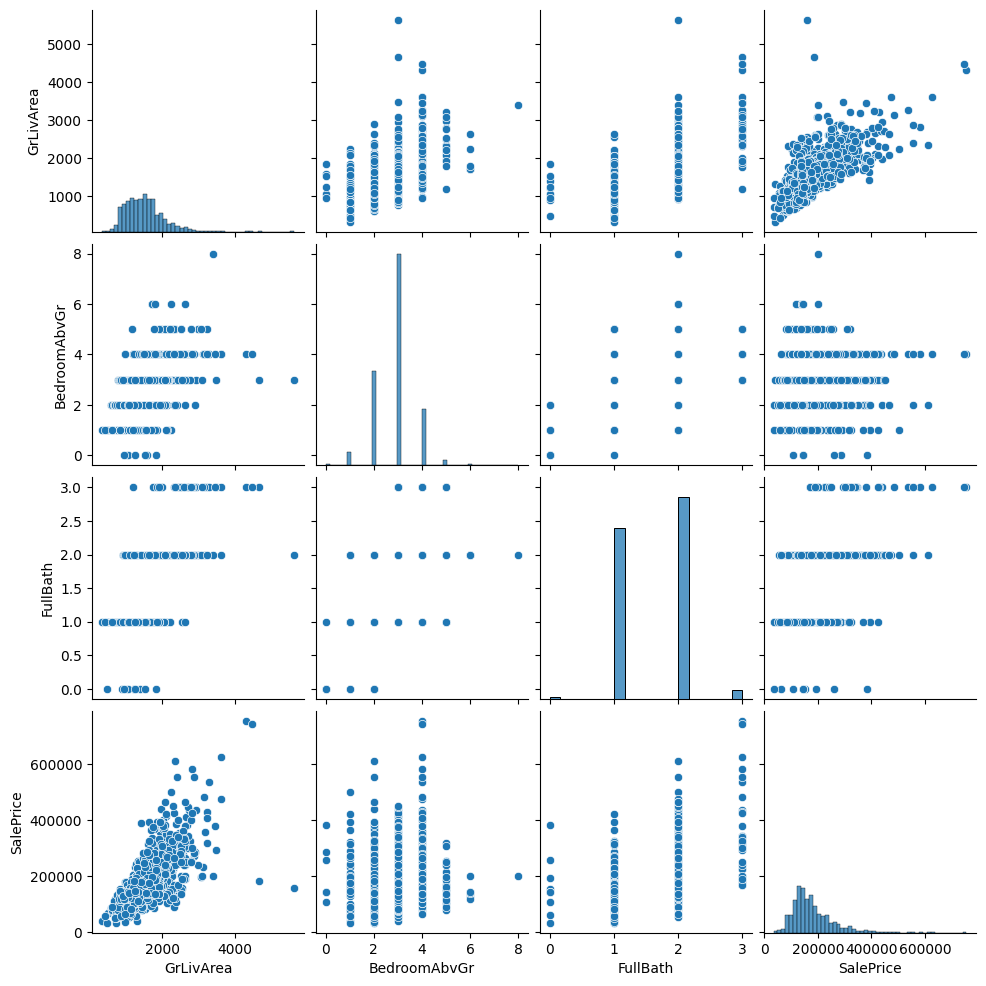

In [5]:
sns.pairplot(data)
plt.show()


In [6]:
X = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Coefficients: [   104.02630701 -26655.16535734  30014.32410896]
Intercept: 52261.748626944594


In [8]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 2806426667.247853
R-squared: 0.6341189942328371


In [15]:
test_features = test_data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]

test_features = test_features.fillna(test_features.mean())

test_predictions = model.predict(test_features)

submission = pd.DataFrame({
    'Id': test_data['Id'], 
    'SalePrice': test_predictions
})
submission.to_csv('submission.csv', index=False)

print("Predictions saved to submission.csv")


Predictions saved to submission.csv


In [16]:
submission = pd.read_csv('submission.csv')
print(submission.head())


     Id      SalePrice
0  1461  122173.313104
1  1462  140561.538683
2  1463  201783.754896
3  1464  199183.097221
4  1465  192133.739106


In [17]:
print(submission['SalePrice'].describe())


count      1459.000000
mean     177926.192507
std       54569.353296
min       88468.789632
25%      132116.863218
50%      177337.572748
75%      211718.267215
max      588994.100358
Name: SalePrice, dtype: float64


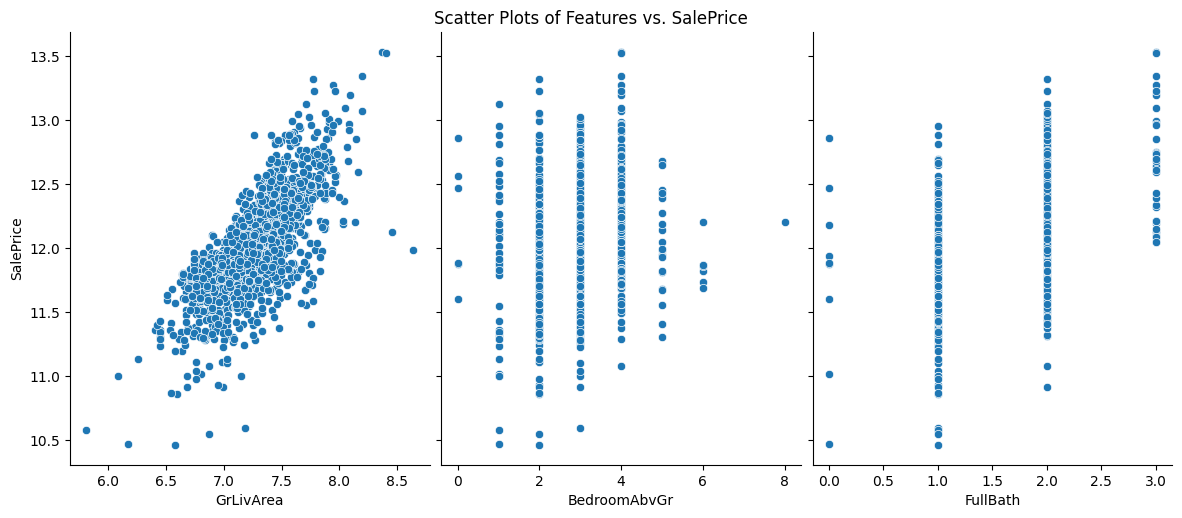

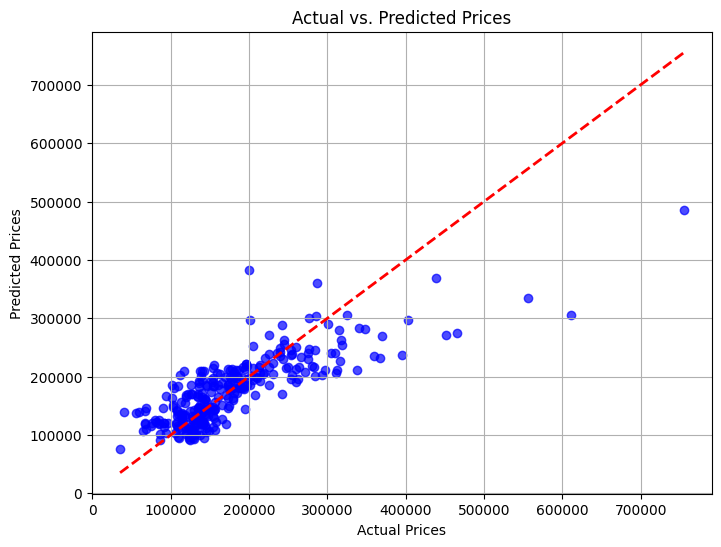

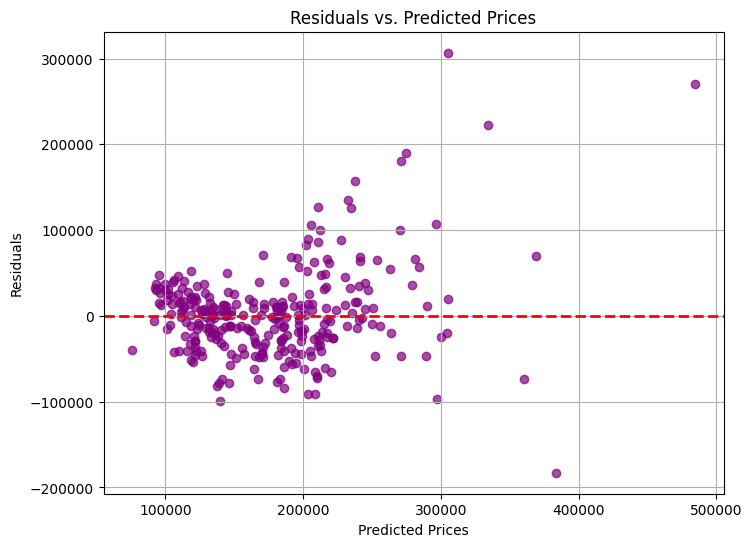

<ipython-input-18-66e039d59ded>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients, y=features, palette='viridis')


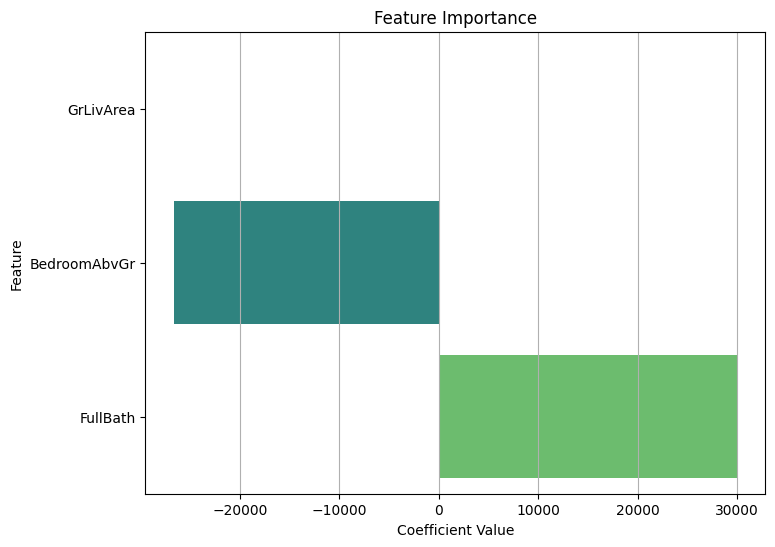

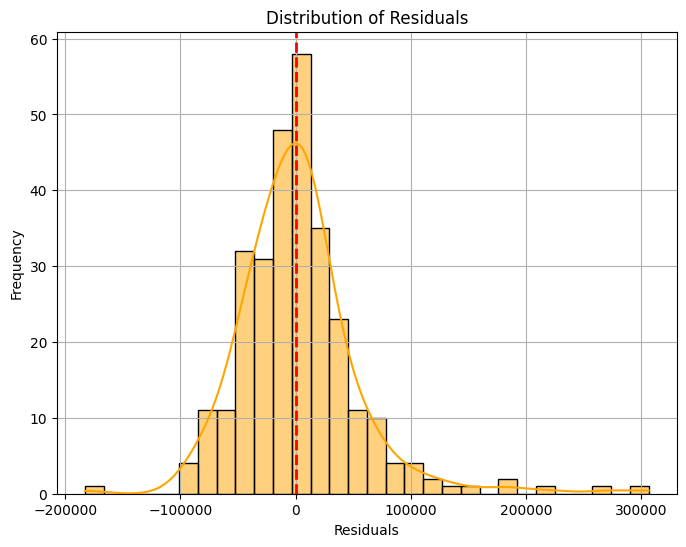

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.pairplot(data, x_vars=['GrLivArea', 'BedroomAbvGr', 'FullBath'], y_vars='SalePrice', height=5, aspect=0.8, kind='scatter')
plt.suptitle("Scatter Plots of Features vs. SalePrice", y=1.02)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Perfect fit line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.grid()
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Prices")
plt.grid()
plt.show()

coefficients = model.coef_
features = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=coefficients, y=features, palette='viridis')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.grid(axis='x')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='orange', bins=30)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.grid()
plt.show()
